In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from numpy.random import Generator, PCG64
#rng = Generator(PCG64(2))

### Duomenų paruošimas

In [2]:
data = pd.read_csv('iris.data', sep=",", header=None)
data.columns = ["sepl", "sepw", "petl", "petw","class"]

In [3]:
one = pd.concat(
    [
        data[data["class"].isin(["Iris-setosa"])].sample(n = 50, random_state=2),
        data[data["class"].isin(["Iris-versicolor", "Iris-virginica"])].sample(n = 100, random_state=2)
    ]
    )

one["class"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 1}, inplace=True)
one["b"] = 1

onex_train, onex_test, oney_train, oney_test = train_test_split(
    np.array(one.loc[:, one.columns != "class"]),
    np.array(one.loc[:, one.columns == "class"]),
    test_size = 0.2,
    random_state = 2)

In [4]:
two = pd.concat(
    [
        data[data["class"].isin(["Iris-versicolor"])].sample(n = 50, random_state=2),
        data[data["class"].isin(["Iris-virginica"])].sample(n = 50, random_state=2)
    ]
    )

two["class"].replace({"Iris-versicolor": 0, "Iris-virginica": 1}, inplace=True)
two["b"] = 1

twox_train, twox_test, twoy_train, twoy_test = train_test_split(
    np.array(two.loc[:, two.columns != "class"]),
    np.array(two.loc[:, two.columns == "class"]),
    test_size = 0.2,
    random_state = 2)

### Metodai

In [5]:
def new_weights(weights, row, prediction, value,lrate):
    # Svorių koregavimas
    new_weights = []
    for i in range(len(weights)):
        new_weights.append(weights[i] + lrate*(value - prediction)*row[i])
    return new_weights

def binary(row,weights):
    # Slenkstine funkcija
    a = np.dot(row, weights)
    if a>=0:
        return 1
    else:
        return 0

def train_binary(lrate, epochs, xtrain, ytrain):
    # Treniravimo funkcija
    weights = [0.5, 0.5, 0.5, 0.5, 0.5]
    errors = [] #error calculation
    
    for e in range(epochs):
        errorssum = 0 #error calculation
        for i in range(len(xtrain)):
            y = binary(xtrain[i], weights)
            row = xtrain[i]
            result = ytrain[i]
            weights = new_weights(weights, row, y, result , lrate)
            
            errorssum += (result - y)**2 #error calculation
            
        errors.append([e,(0.5*errorssum)[0]]) #error calculation

    plot_error(pd.DataFrame(errors, columns = ["epoch", "error"]), "Binary error graph")
    return (weights, errors[-1][1])

def test_binary(weights, xtest, ytest):
    # Matuoja slenkstinio modelio taikluma
    success = 0
    for i in range(len(xtest)):
        if binary(xtest[i],weights) == ytest[i][0]:
            success +=1
    return success/len(xtest)

def sigmoid(row,weights):
    # Sigmoidine funkcija
    a = np.dot(row, weights)
    return 1/(1+math.exp(-a))

def train_sigmoid(lrate, epochs, xtrain, ytrain):
    # Treniravimo funkcija
    weights = [0.5, 0.5, 0.5, 0.5, 0.5]
    errors = [] #error calculation
    
    for e in range(epochs):
        errorssum = 0 #error calculation
        for i in range(len(xtrain)):
            y = sigmoid(xtrain[i], weights)
            row = xtrain[i]
            result = ytrain[i]
            weights = new_weights(weights, row, y, result , lrate)
            
            errorssum += (result - y)**2 #error calculation
            
        errors.append([e,(0.5*errorssum)[0]]) #error calculation

    plot_error(pd.DataFrame(errors, columns = ["epoch", "error"]), "Sigmoid error graph")
    return (weights, errors[-1][1])

def test_sigmoid(weights, xtest, ytest):
    # Matuoja sigmoidinio modelio taikluma
    success = 0
    for i in range(len(xtest)):
        if round(sigmoid(xtest[i],weights) ,0) == ytest[i][0]:
            success +=1
    return success/len(xtest)

def plot_error(data, title):
    x = data.epoch
    y = data.error
    plt.plot(x,y, alpha = 0.7)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.rcParams["figure.figsize"] = (15,3)
    plt.title(title)
    

### Pirmi duomenys, slenkstine funkcija

Final weights: [-1.8, -4.7, 7.5, 3.7, -0.5]   Final error: 0.0 Accuracy: 1.0


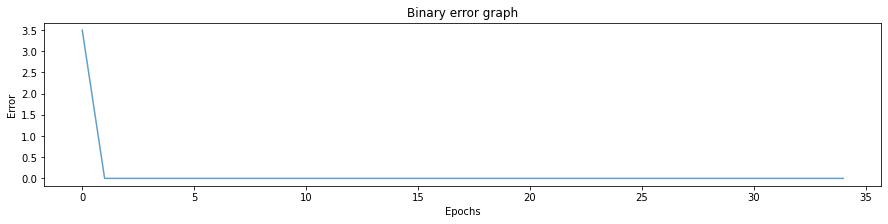

In [16]:
onebinary = train_binary(1, 35, onex_train, oney_train)
print("Final weights:", [round(i[0],4) for i in onebinary[0]], " ", 
      "Final error:", onebinary[1], 
      "Accuracy:", test_binary(onebinary[0], onex_test, oney_test))


### Pirmi duomenys, sigmoidine funkcija

Final weights: [-1.8907, -5.1006, 8.8883, 4.5235, -0.6061]   Final error: 8.991662158915849e-08 Accuracy: 1.0


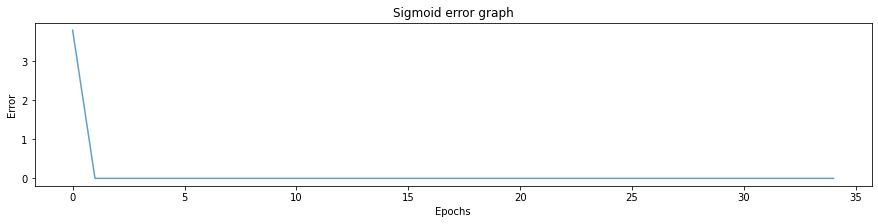

In [7]:
onesigmoid = train_sigmoid(1, 35, onex_train, oney_train)
print("Final weights:", [round(i[0],4) for i in onesigmoid[0]], " ", 
      "Final error:", onesigmoid[1], 
      "Accuracy:", test_sigmoid(onesigmoid[0], onex_test, oney_test))

### Antri duomenys, slenkstine funkcija

Final weights: [-36.0, -50.8, 50.5, 78.9, -37.5]   Final error: 5.5 Accuracy: 0.9


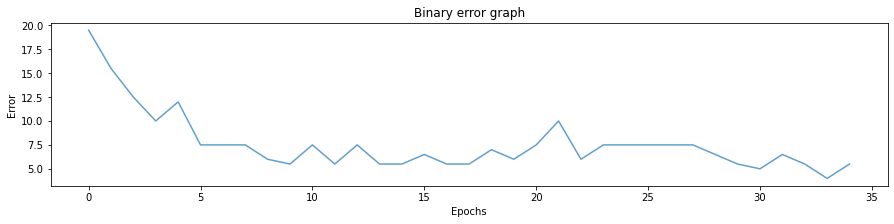

In [8]:
twobinary = train_binary(1, 35, twox_train, twoy_train)
print("Final weights:", [round(i[0],4) for i in twobinary[0]], " ", 
      "Final error:", twobinary[1], 
      "Accuracy:", test_binary(twobinary[0], twox_test, twoy_test))

### Antri duomenys, sigmoidine funkcija

Final weights: [-29.9236, -51.6058, 41.899, 79.3348, -32.7426]   Final error: 4.128428867098631 Accuracy: 0.9


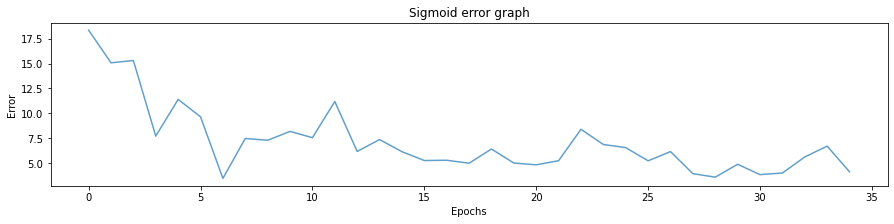

In [9]:
twosigmoid = train_sigmoid(1, 35, twox_train, twoy_train)
print("Final weights:", [round(i[0],4) for i in twosigmoid[0]], " ", 
      "Final error:", twosigmoid[1], 
      "Accuracy:", test_sigmoid(twosigmoid[0], twox_test, twoy_test))

### 1 duomenų tyrimas

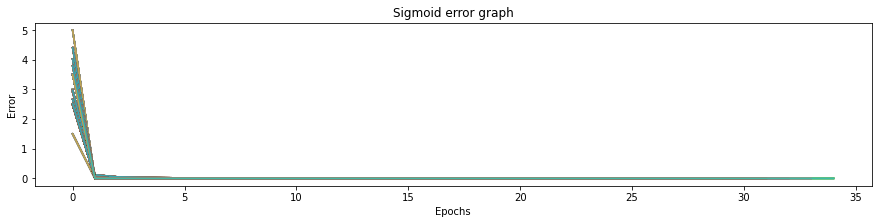

In [10]:
onetest = []

for lrate in np.arange(0.1, 1.1,0.1):
    for epoch in np.arange(1,36,1):
        model1 = train_binary(lrate, epoch, onex_train, oney_train)
        accuracy1 = test_binary(model1[0], onex_test, oney_test)
        onetest.append(["binary",lrate, epoch, accuracy1])
        
        model2 = train_sigmoid(lrate, epoch, onex_train, oney_train)
        accuracy2 = test_sigmoid(model2[0], onex_test, oney_test)
        onetest.append(["sigmoid",lrate, epoch, accuracy2])
  

In [11]:
pd.DataFrame(onetest, columns = ["function","learning_rate","epochs","accuracy"]).to_csv("testone.csv", index = False)

### 2 duomenų tyrimas

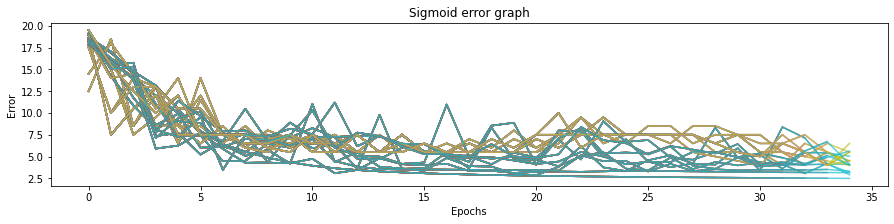

In [12]:
twotest = []

for lrate in np.arange(0.1, 1.1,0.1):
    for epoch in np.arange(1,36,1):
        model1 = train_binary(lrate, epoch, twox_train, twoy_train)
        accuracy1 = test_binary(model1[0], twox_test, twoy_test)
        twotest.append(["binary",lrate, epoch, accuracy1])
        
        model2 = train_sigmoid(lrate, epoch, twox_train, twoy_train)
        accuracy2 = test_sigmoid(model2[0], twox_test, twoy_test)
        twotest.append(["sigmoid",lrate, epoch, accuracy2])
  

In [13]:
pd.DataFrame(twotest, columns = ["function","learning_rate","epochs","accuracy"]).to_csv("testtwo.csv", index = False)

### Geriausias variantas

In [56]:
def test_binary_return_data(weights, xtest, ytest):
    # Matuoja slenkstinio modelio taikluma
    success = 0
    guesses = []
    for i in range(len(xtest)):
        guess = binary(xtest[i],weights)
        guesses.append((xtest[i], guess, ytest[i][0]))
        if  guess== ytest[i][0]:
            success +=1
    return (success/len(xtest), guesses)

 Gauti svoriai: [-5.74, -10.27, 8.36, 15.89, -6.1] 
 Paklaida: 6.5 
 Tikslumas: 0.95


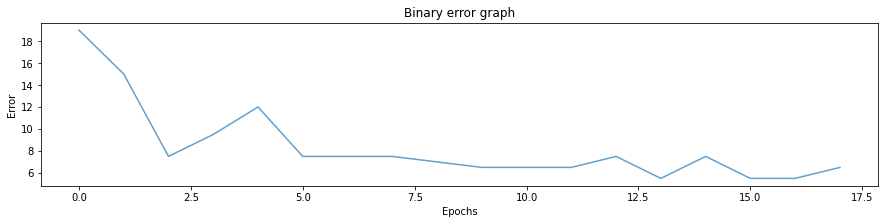

In [57]:
best = train_binary(0.3, 18, twox_train, twoy_train)
besttest = test_binary_return_data(best[0], twox_test, twoy_test)
print(" Gauti svoriai:", [round(i[0],4) for i in best[0]], "\n", 
      "Paklaida:", best[1], "\n"
      " Tikslumas:", besttest[0])

In [59]:
for i in besttest[1]:
    print("Įejimas:",i[0], " Spėjimas:", i[1], "Tikra klasė:", i[2])

Įejimas: [6.9 3.2 5.7 2.3 1. ]  Spėjimas: 1 Tikra klasė: 1
Įejimas: [6.5 2.8 4.6 1.5 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [6.7 3.3 5.7 2.5 1. ]  Spėjimas: 1 Tikra klasė: 1
Įejimas: [5.7 2.6 3.5 1.  1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [5.6 3.  4.5 1.5 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [6.4 3.2 4.5 1.5 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [6.  2.9 4.5 1.5 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [5.6 2.5 3.9 1.1 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [6.3 2.3 4.4 1.3 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [6.  2.2 4.  1.  1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [6.7 3.1 5.6 2.4 1. ]  Spėjimas: 1 Tikra klasė: 1
Įejimas: [6.4 2.7 5.3 1.9 1. ]  Spėjimas: 1 Tikra klasė: 1
Įejimas: [6.9 3.1 5.1 2.3 1. ]  Spėjimas: 1 Tikra klasė: 1
Įejimas: [6.7 3.  5.  1.7 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [6.7 3.1 4.7 1.5 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [5.7 2.8 4.5 1.3 1. ]  Spėjimas: 0 Tikra klasė: 0
Įejimas: [5.2 2.7 3.9 1.4 1. ]  Spėjimas: 0 Tikra klasė: